# CSE 5334, spring 2023, University of Texas at Arlington
# Programming Assignment 1


## **Academic Honesty**
This assignment must be done individually and independently. You must implement the whole assignment by yourself. Academic dishonesty is not tolerated.

## **Requirements**

1.   When you work on this assignment, you should make a copy of this notebook in Google Colab. This can be done using the option `File > Save a copy in Drive` in Google Colab. 
2.   You should fill in your answer for each task inside the code block right under the task. 
3.   You should only insert your code into the designated code blocks, as mentioned above. Other than that, you shouldn't change anything else in the notebook.

5.  Most of the tasks can be solved with 1 line of code. But you are allowed to use up to 3 lines of code for any task (except Task 10 for which your answer can be longer). 
6.   You may not use any other imports to solve the tasks. In other words, you shouldn't use `import` in any designated code blocks for the tasks.
7.   You should not use any loops, if statement, or list/dictionary comprehensions, except for Task 10. You can solve all the tasks by only using features and functions from pandas. 
8.   Even if you can only partially solve a task, you should include your code in the code block, which allows us to consider partial credit. 
9.   However, your code should not raise errors. Any code raising errors will not get partial credit. 
10.   vehicule_share.csv,task5.pkl and task9.pkl are the files that  will be used in the assigment1 and their link is in DataSet in modules section in canvas.https://drive.google.com/drive/folders/1hnymJoBCzZdP_B-x4ISb7z4I4BMS2s8T?usp=sharing)
11.   To submit your assignment, download your Colab into a .ipynb file. This can be done using the option `Download > Download .ipynb` in Google Colab.
12.   Submit the downloaded .ipynb file into the Programming Assignment 2 entry in Canvas.


## **Dataset**

In this assignment, we will do data munging and analysis on a dataset about vehicle sharing. You can run the following code to download the dataset and load it into a `DataFrame` `trips`.

This dataset is generated from a vehicle sharing service. Every row represents a trip and has the following columns: 
- *Start Time* - The time when the trip started
- *End Time* - The time when the trip ended
- *Trip Duration* - Total time duration (in seconds) of the trip
- *Start Station* - Name of the trip's start station
- *End Station* - Name of the trip's end station
- *User Type* -  Type of the user. **Subscriber** refers to the users that subscribed to the service; **Customer** refers the users who take rides without any subscription. 
- *Birth Year* - The birth year of the user

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd

from itertools import chain

#For visualization. Matplotlib for basic visualization and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

!curl -L -o vehicle_share.csv "https://drive.google.com/uc?export=download&id=1g2TjniSa8pZvwmRPYSbPhlnkcdHxNtre"

!curl -L -o task5.pkl "https://drive.google.com/uc?export=download&id=1uH_J8myaXfc2asZBsT_0uN8YuqLz4lPm"

!curl -L -o task9.pkl "https://drive.google.com/uc?export=download&id=1BcYHgR4brGh7FUKBW5YLPCPzw0xxjq7o"

!curl -L -o task10.pkl "https://drive.google.com/uc?export=download&id=1e-l6MmgiBiAWt8mtamyoazo7llBt3ghl"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 21.9M  100 21.9M    0     0  13.8M      0  0:00:01  0:00:01 --:--:-- 13.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 9748k  100 9748k    0     0  11.3M      0 --:--:-- --:--:-- --:--:-- 11.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
100 10.9M  100 10.9M    0     0  2101k      0  0:00:05  0:00:05 --:--:-- 41.0M
  % Total    % Received % Xferd  Average Speed   Tim

In [2]:
#load the file  vehicle_share.csv into a dataframe trips
trips = pd.read_csv('vehicle_share.csv')
#return the first 5 rows of the dataset 
trips.head()

,ID,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610.0,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0
1,961916,2017-05-26 09:41:44,2017-05-26 09:46:25,281.0,Ashland Ave & Lake St,Wood St & Hubbard St,Subscriber,Female,1983.0
2,1023296,2017-05-30 15:46:18,2017-05-30 15:52:12,354.0,Larrabee St & Kingsbury St,Clark St & Elm St,Subscriber,Male,1985.0
3,958716,2017-05-25 22:59:33,2017-05-25 23:07:19,466.0,Clark St & Armitage Ave,Sheffield Ave & Wrightwood Ave,Subscriber,Female,1985.0
4,718598,2017-05-03 13:20:38,2017-05-03 13:31:13,635.0,Ada St & Washington Blvd,Daley Center Plaza,Subscriber,Male,1967.0


Let's gain some basic understanding of the dataset

In [3]:
#For each task below, look for a Pandas function to do the task.
print("dimension:",np.ndim(trips))
#b=np.shape(trips)
#c=np.size(trips)
print("trips_features:" ,trips.columns)
print("stats:\n" ,trips.describe())
#Task a: Print the details of the df_data data frame (information such as dimensionality, names of features (note that there's no target variable here), statistical details, etc)

print("count of end stations :\n",trips['End Station'].value_counts())
print("\n")
#Task b: Print the Name of the trip's end station used in the dataset with the number of their occurences

print("number of duplicates:",len(trips[trips.duplicated()]))
trips = trips.drop_duplicates()
print(len(trips[trips.duplicated()]))
#Task c: Print the number of duplicated rows in the dataset and remove the duplicated rows


dimension: 2
trips_features: Index(['ID', 'Start Time', 'End Time', 'Trip Duration', 'Start Station',
       'End Station', 'User Type', 'Gender', 'Birth Year'],
      dtype='object')
stats:
                  ID  Trip Duration     Birth Year
count  1.919630e+05  191963.000000  110501.000000
mean   2.171588e+06    1059.270001    1979.681306
std    1.604157e+06    4303.460797      11.427317
min    7.003540e+05      60.000000    1886.000000
25%    9.496235e+05     406.000000    1972.000000
50%    1.183765e+06     694.000000    1983.000000
75%    3.991690e+06    1186.823000    1989.000000
max    5.084641e+06  885567.607000    2016.000000
count of end stations :
 Streeter Dr & Grand Ave               1939
Columbus Circle / Union Station       1158
Lake Shore Dr & Monroe St             1117
Lincoln Memorial                      1072
Jefferson Dr & 14th St SW             1070
                                      ... 
Shields Ave & 43rd St                    1
Jones Branch & Westbranch Dr    

## **Need for data cleaning and preprocessing**

The results of these several functions indicate a few needs for cleaning and preprocessing the data:

1) The column `Birth Year` should be integer, but it has floating point values.

2) There are null values in a few columns. 

3) The values in columns `Start Time` and `End Time` are strings. We need to convert them to `datetime` values.


Let's find out which columns have null values. This could be derived from the `Non-Null Count` in the output of `trips.info()`. But there are simpler ways.

## **Task 1: For each column, find the number of rows with null value in that column.** 

If your code for this task is correct, its output should tell you that two columns have null values --- column `Gender` has missing value in 81676 rows and 81462 for column `Birth Year`. Other columns have no null values. 

In [4]:
# Code for Task 1
trips.isnull().sum()

ID                   0
Start Time           0
End Time             0
Trip Duration        0
Start Station        0
End Station          0
User Type            0
Gender           81676
Birth Year       81462
dtype: int64



The `ID` column is not useful in our analysis. Hence, let's take it out. 

## **Task 2: Remove the `ID` column from the DataFrame `trips`.**

In [5]:
# Code for Task 2
trips=trips.drop("ID",axis=1)
trips.head()

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,2017-05-25 18:19:03,2017-05-25 18:45:53,1610.0,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0
1,2017-05-26 09:41:44,2017-05-26 09:46:25,281.0,Ashland Ave & Lake St,Wood St & Hubbard St,Subscriber,Female,1983.0
2,2017-05-30 15:46:18,2017-05-30 15:52:12,354.0,Larrabee St & Kingsbury St,Clark St & Elm St,Subscriber,Male,1985.0
3,2017-05-25 22:59:33,2017-05-25 23:07:19,466.0,Clark St & Armitage Ave,Sheffield Ave & Wrightwood Ave,Subscriber,Female,1985.0
4,2017-05-03 13:20:38,2017-05-03 13:31:13,635.0,Ada St & Washington Blvd,Daley Center Plaza,Subscriber,Male,1967.0


## **Task 3: Replace null values in column `Gender` by `'Unknown'`. Replace null values in column `Birth Year` by -1. Note that this task has two desiganated code blocks.** 

The column `Gender` has Null values, as `trips.describe()` shows. Hence, we are using a string `Unknown` to indicate that the user's gender information is not recorded. The column `Birth Year` has Null values too. We thus use -1 to indicate missing values in `Birth Year`.

In [6]:
# Code for Task 3 : code block for replacing null values in column Gender by ``Unknown``.
trips["Gender"]=trips["Gender"].fillna("Unknown")
print(trips["Gender"])
print("number of null values in updated Column gender:",trips["Gender"].isnull().sum())

0         Female
1         Female
2           Male
3         Female
4           Male
           ...  
191958      Male
191959    Female
191960      Male
191961    Female
191962      Male
Name: Gender, Length: 191963, dtype: object
number of null values in updated Column gender: 0


In [7]:
# Code for Task 3: code block for replacing null values in column Birth Year by -1.
trips['Birth Year']=trips['Birth Year'].fillna(-1)
print(trips['Birth Year'])
print("number of null values in updated Column birth:",trips['Birth Year'].isna().sum())

0         1992.0
1         1983.0
2         1985.0
3         1985.0
4         1967.0
           ...  
191958    1972.0
191959    1982.0
191960    1972.0
191961    1991.0
191962    1972.0
Name: Birth Year, Length: 191963, dtype: float64
number of null values in updated Column birth: 0


## **Task 4: Convert the data type of column ``Birth year`` to integer. Convert the data type of column ``Start Time`` and ``End Time`` to `datetime`.  Note that this task has two designated code blocks.**

In [8]:
# Code for Task 4: code block for converting the data type of column ``Year Pubblished`` to integer.
trips['Birth Year']=trips['Birth Year'].astype(int)
trips.dtypes

Start Time        object
End Time          object
Trip Duration    float64
Start Station     object
End Station       object
User Type         object
Gender            object
Birth Year         int64
dtype: object

In [9]:
# Code for Task 4: code block for converting the data type of column ``Start Time`` and ``End Time`` to ``datetime``. 
#trips['Start Time']=pd.to_datetime(trips['Start Time']) or
trips['Start Time']=trips['Start Time'].astype('datetime64[ns]')
#trips['End Time']=pd.to_datetime(trips['End Time']) or
trips['End Time']=trips['End Time'].astype('datetime64[ns]')
trips.dtypes

Start Time       datetime64[ns]
End Time         datetime64[ns]
Trip Duration           float64
Start Station            object
End Station              object
User Type                object
Gender                   object
Birth Year                int64
dtype: object

Run the following code cell so that, even if your code in preceding tasks messed up the data, it will not affect the ensuing tasks.

In [10]:
import pandas as pd
#load the file  task5.pkl into a dataframe trips
trips = pd.read_pickle("task5.pkl")
trips.head()


,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,2017-05-25 18:19:03,2017-05-25 18:45:53,1610.0,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
1,2017-05-26 09:41:44,2017-05-26 09:46:25,281.0,Ashland Ave & Lake St,Wood St & Hubbard St,Subscriber,Female,1983
2,2017-05-30 15:46:18,2017-05-30 15:52:12,354.0,Larrabee St & Kingsbury St,Clark St & Elm St,Subscriber,Male,1985
3,2017-05-25 22:59:33,2017-05-25 23:07:19,466.0,Clark St & Armitage Ave,Sheffield Ave & Wrightwood Ave,Subscriber,Female,1985
4,2017-05-03 13:20:38,2017-05-03 13:31:13,635.0,Ada St & Washington Blvd,Daley Center Plaza,Subscriber,Male,1967


We want to find out which gender of users used the vehicle sharing service more often.

## **Task 5: Get the frequency of trips for both the Genders.**

male 82335 
Female 27952


<Axes: ylabel='Gender'>

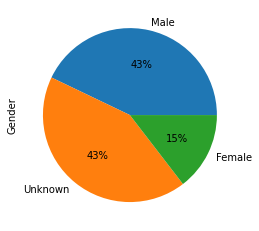

In [11]:
# Code for Task 5
print("male",(trips["Gender"]=='Male').sum(),"\nFemale",(trips["Gender"]=='Female').sum())
## Task 5-1: Get the frequency of trips for both the  Genders.
trips["Gender"].value_counts().plot(kind="pie",autopct='%.0f%%')
# Task 5-2 Display the pie chart that represents the percentage (%) of trips for each Genders and display percentages in legend respectively


## **Task 6: Get the number of trips with each station as the starting point. Sort the start stations by frequency of trips, in descending order.**

If you get the correct code, you will find that for 1719 trips `Streeter Dr & Grand Ave` is the `Starting Station`, which is the most among all stations. 

In [12]:
# Code for Task 6
trips['Start Station'].value_counts() #below will give the same output
#trips['Start Station'].value_counts().sort_values(ascending=False)

Streeter Dr & Grand Ave            1719
Lake Shore Dr & Monroe St          1211
Lincoln Memorial                   1112
Jefferson Dr & 14th St SW          1042
Columbus Circle / Union Station    1011
                                   ... 
Phillips Ave & 79th St                1
Damen Ave & 59th St                   1
Exchange Ave & 79th St                1
Halsted St & 69th St                  1
NYCBS Depot - GOW                     1
Name: Start Station, Length: 1616, dtype: int64


## **Task 7: Find the longest trip (in seconds) in our dataset.**


In [13]:
# Code for Task 7
trips["Trip Duration"].max()

885567.6070000001

## **Task 8: Find the start station and end staion for the longest trip.**

If your code is correct, it should show the start and the end stations are __19th St & Constitution Ave NW__ and __23rd & E St NW__, respectively.

In [14]:
# Code for Task 8
print(trips.sort_values(by="Trip Duration",ascending=False).iloc[0]['Start Station'])
trips.sort_values(by="Trip Duration",ascending=False).iloc[0]['End Station']

19th St & Constitution Ave NW


'23rd & E St NW '

<Axes: xlabel='Gender'>

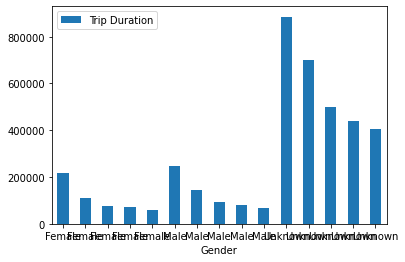

In [16]:
#Display the countplot of  the  5 top  Trip Duration for each gender
bcs = trips.groupby('Gender')['Trip Duration'].nlargest(5).reset_index()
bcs.plot.bar(x='Gender', y='Trip Duration', rot=0)

We want to analyze the user base of the vehicle sharing service, especially their age. For that let's create an `Age` column based on `Birth Year`. Since the trips all took place in May 2017, we should calculate the users' ages then (i.e., 2017) instead of now.

## **Task 9: Create a column `Age` using `Birth Year`.**




In [17]:
# Code for Task 9
trips["Age"]=2017-trips["Birth Year"]
trips.head()

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,Age
0,2017-05-25 18:19:03,2017-05-25 18:45:53,1610.0,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,25
1,2017-05-26 09:41:44,2017-05-26 09:46:25,281.0,Ashland Ave & Lake St,Wood St & Hubbard St,Subscriber,Female,1983,34
2,2017-05-30 15:46:18,2017-05-30 15:52:12,354.0,Larrabee St & Kingsbury St,Clark St & Elm St,Subscriber,Male,1985,32
3,2017-05-25 22:59:33,2017-05-25 23:07:19,466.0,Clark St & Armitage Ave,Sheffield Ave & Wrightwood Ave,Subscriber,Female,1985,32
4,2017-05-03 13:20:38,2017-05-03 13:31:13,635.0,Ada St & Washington Blvd,Daley Center Plaza,Subscriber,Male,1967,50


In Task 3 we replaced null values in `Birth Year` with -1. Some of the `Age` values thus incorrectly become 2018. We need to replace them with -1 again.

In [18]:
trips['Age'] = trips['Age'].replace(2018, -1)

Run the following code cell so that, even if your code in preceding tasks messed up the data, it will not affect the ensuing tasks.

In [19]:
import pandas as pd
#load the file task9.pkl into a dataframe trips
trips = pd.read_pickle("task9.pkl")
trips.head()

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,Age
0,2017-05-25 18:19:03,2017-05-25 18:45:53,1610.0,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,25
1,2017-05-26 09:41:44,2017-05-26 09:46:25,281.0,Ashland Ave & Lake St,Wood St & Hubbard St,Subscriber,Female,1983,34
2,2017-05-30 15:46:18,2017-05-30 15:52:12,354.0,Larrabee St & Kingsbury St,Clark St & Elm St,Subscriber,Male,1985,32
3,2017-05-25 22:59:33,2017-05-25 23:07:19,466.0,Clark St & Armitage Ave,Sheffield Ave & Wrightwood Ave,Subscriber,Female,1985,32
4,2017-05-03 13:20:38,2017-05-03 13:31:13,635.0,Ada St & Washington Blvd,Daley Center Plaza,Subscriber,Male,1967,50


Now let's create a categorical feature `Age Group` based on `Age`. We can discretize `Age` into `Child` (for 00-14 years old), `Youth` (for 14-24 years old), `Adult` (for 24-64 years old), and `Senior` (64 years and over). We should set the value of `Age Group` to a string `N/A` if the `Age` value is -1. In every category range, the starting point is inclusive and the endpoint is exclusive. For instance, the `Child` group is for those with `Age` >= 0 and `Age` < 14.

## **Task 10: Create a column `Age Group` and assign string values in this column based on `Age` according to the above description.**

In [20]:
# Code for Task 10
def aG(year):
  if year< 0:
      return("N/A")
  elif year>0 and year<14:
      return("Child")
  elif year>14 and year<24:
      return("Youth")
  elif year>24 and year<64:
      return("Adult")
  else:
      return("Senior")
trips["Age Group"]=trips["Age"].apply(aG)
trips.head()
#trips['Age Group'] = pd.cut(trips['Age'], bins=[0, 14, 24, 64], labels=[ 'Child', 'Youth','Adult'])

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,Age,Age Group
0,2017-05-25 18:19:03,2017-05-25 18:45:53,1610.0,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,25,Adult
1,2017-05-26 09:41:44,2017-05-26 09:46:25,281.0,Ashland Ave & Lake St,Wood St & Hubbard St,Subscriber,Female,1983,34,Adult
2,2017-05-30 15:46:18,2017-05-30 15:52:12,354.0,Larrabee St & Kingsbury St,Clark St & Elm St,Subscriber,Male,1985,32,Adult
3,2017-05-25 22:59:33,2017-05-25 23:07:19,466.0,Clark St & Armitage Ave,Sheffield Ave & Wrightwood Ave,Subscriber,Female,1985,32,Adult
4,2017-05-03 13:20:38,2017-05-03 13:31:13,635.0,Ada St & Washington Blvd,Daley Center Plaza,Subscriber,Male,1967,50,Adult


In [21]:
trips['Age Group'].value_counts()

Adult     99851
N/A       81462
Senior     6014
Youth      4635
Child         1
Name: Age Group, dtype: int64

Run the following code cell so that, even if your code in preceding tasks messed up the data, it will not affect the ensuing tasks.

In [22]:
import pandas as pd
#load the file task10.pkl into a dataframe trips
trips = pd.read_pickle("task10.pkl")
trips.head()

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,Age,Age Group
0,2017-05-25 18:19:03,2017-05-25 18:45:53,1610.0,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,25,Adult
1,2017-05-26 09:41:44,2017-05-26 09:46:25,281.0,Ashland Ave & Lake St,Wood St & Hubbard St,Subscriber,Female,1983,34,Adult
2,2017-05-30 15:46:18,2017-05-30 15:52:12,354.0,Larrabee St & Kingsbury St,Clark St & Elm St,Subscriber,Male,1985,32,Adult
3,2017-05-25 22:59:33,2017-05-25 23:07:19,466.0,Clark St & Armitage Ave,Sheffield Ave & Wrightwood Ave,Subscriber,Female,1985,32,Adult
4,2017-05-03 13:20:38,2017-05-03 13:31:13,635.0,Ada St & Washington Blvd,Daley Center Plaza,Subscriber,Male,1967,50,Adult


Our next task attempts to examine the relationship between `Age Group` and average trip time.

## **Task 11: For each value of `Age Group` (except for `N/A`), find the average `Trip Duration`.**

In [23]:
# Code for Task 11-1
chbs=trips[trips['Age Group'] != 'N/A']
avge =chbs.groupby('Age Group')['Trip Duration'].mean()
print(avge)

Age Group
Adult     765.169711
Child     639.000000
Senior    784.281887
Youth     740.381014
Name: Trip Duration, dtype: float64


<Axes: xlabel='Age Group'>

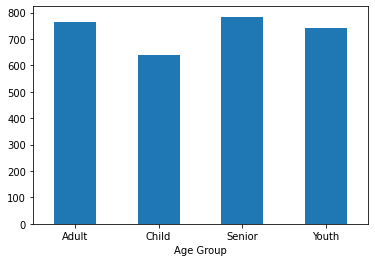

In [24]:
# Code for Task 11-2
#Display the countplot of  the average Trip Duration for each Age Group
avge.plot.bar(x='Age Group', rot=0)

## **Task 12: Produce a pivot table of number of trips, using `Gender` for rows and `User type` for columns. Exclude the trips from users whose gender is `Unknown`.**


In [25]:
# Code for Task 12 
bsai=trips[trips['Gender'] != 'Unknown']
bble =pd.pivot_table(bsai, index="Gender", columns="User Type",aggfunc='count',values="End Station")
print(bble)

User Type  Customer  Subscriber
Gender                         
Female          475       27477
Male            895       81440


## **Task 13: Get the average `Trip Duration` for each day of a week. The results should be sorted by average trip duration.**

To decide the day of a trip, we only consider the trip's start time. For instance, if a trip starts on Monday, it is a Monday trip, regardless of when it ends. 



In [26]:
# Code for Task 13-1
tripdavg= trips.groupby(trips['Start Time'].dt.day_name())['Trip Duration'].mean().sort_values()
print(tripdavg)

Start Time
Thursday      898.084620
Tuesday       918.600529
Wednesday     940.540680
Friday        964.368331
Monday       1092.311058
Saturday     1344.448537
Sunday       1382.117428
Name: Trip Duration, dtype: float64


<Axes: xlabel='Start Time'>

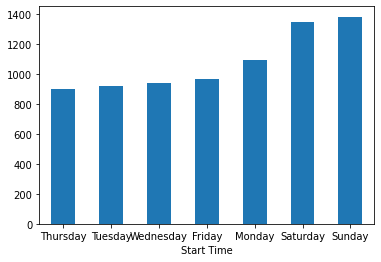

In [27]:
# Code for Task 13-2
tripdavg.plot.bar(x='Start Time', rot=0)
#Display the countplot of  the average Trip Duration for each day of a week

## **Task 14: Get the three most popular trip routes, in terms of `Start Station` and `End Station`**


In [28]:
# Code for Task 14
sai=trips.groupby(['Start Station', 'End Station'])['Start Station', 'End Station'].value_counts().nlargest(3)
print(sai)

<ipython-input-28-4aed37d00805>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sai=trips.groupby(['Start Station', 'End Station'])['Start Station', 'End Station'].value_counts().nlargest(3)


Start Station              End Station              
Lake Shore Dr & Monroe St  Streeter Dr & Grand Ave      255
Streeter Dr & Grand Ave    Streeter Dr & Grand Ave      172
Lake Shore Dr & Monroe St  Lake Shore Dr & Monroe St    165
dtype: int64


Gender who often used the three most popular trips is'Unknown'


<Axes: xlabel='Gender', ylabel='count'>

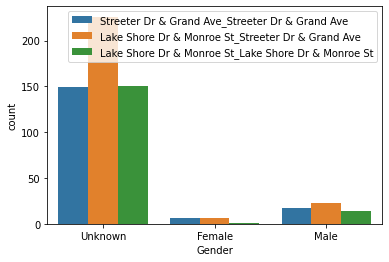

In [29]:
#Task 14-2 find out which gender of users used the three most popular trip routes more often.

chbsai=trips.groupby(by=['Start Station','End Station']).count().iloc[:,0].sort_values().tail(3)[::-1].reset_index()
print("Gender who often used the three most popular trips is'{}'".format(trips[((trips['Start Station'] + trips['End Station']).isin(chbsai['Start Station'] + chbsai['End Station']))].groupby('Gender').count().iloc[:,0].sort_values().tail(1).index[0]))
# Task 14-3: Display the countplot of the three most popular trip routes more often for  each of the genders 

bharg=trips[((trips[['Start Station','End Station']].apply(' _ '.join,axis=1)).isin(chbsai[['Start Station','End Station']].apply(' _ '.join,axis=1)))].loc[:,'Start Station':'Gender']
sns.countplot(x='Gender',data=bharg,hue=bharg[['Start Station','End Station']].apply("_".join,axis=1))
